In [19]:

import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba dabych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba dabych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


Text(0.5, 1.0, '5')

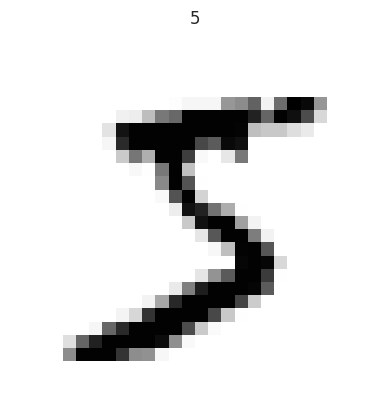

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')
plt.title(y_train[0])

In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

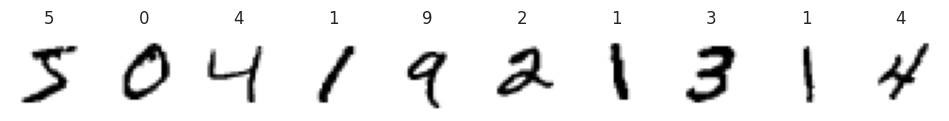

In [7]:
fig = plt.figure(figsize=(12,8))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i])
  plt.axis('off')
plt.show()

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.6  0.99 0.35
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


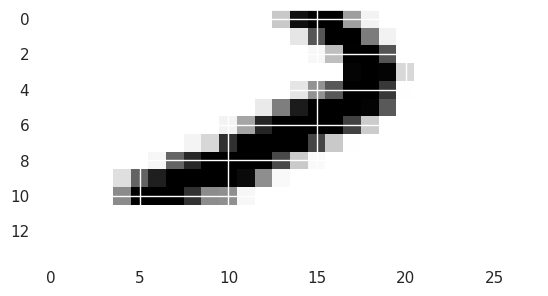

In [8]:

print((X_train[0][10]).round(2))

# dolna połówka obrazka
plt.imshow(X_train[0][14:], cmap='Greys')

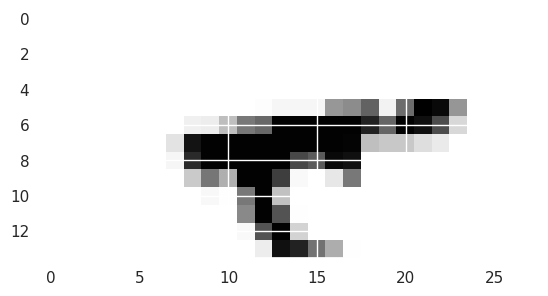

In [9]:
# górna połówka obrazka
plt.imshow(X_train[0][:14], cmap='Greys')

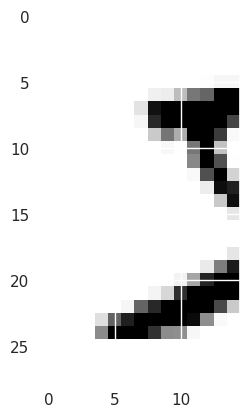

In [10]:
plt.imshow(X_train[0][:,:15], cmap='Greys')

In [11]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [12]:
X_train.shape

(60000, 784)

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
model = Sequential()
model.add(Dense(input_shape=(28*28,), units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
469/469 [==============================] - 12s 11ms/step - loss: 0.2310 - accuracy: 0.9277 - val_loss: 0.0885 - val_accuracy: 0.9723
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0811 - accuracy: 0.9748 - val_loss: 0.0877 - val_accuracy: 0.9732
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0693 - val_accuracy: 0.9794
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0701 - val_accuracy: 0.9803
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0671 - val_accuracy: 0.9821
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0849 - val_accuracy: 0.9786
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0646 - val_accuracy: 0.9822
Epoc

In [20]:
df = pd.DataFrame(history.history)

In [21]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.231014,0.927683,0.088460,0.9723
1,0.081105,0.974800,0.087676,0.9732
2,0.052825,0.983250,0.069286,0.9794
3,0.036134,0.988367,0.070113,0.9803
4,0.026518,0.991183,0.067062,0.9821
5,0.020371,0.993617,0.084877,0.9786
6,0.014423,0.995517,0.064581,0.9822
7,0.011338,0.996417,0.065421,0.9846
8,0.008373,0.997233,0.078152,0.9816
9,0.006879,0.997717,0.083650,0.9827


In [22]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9853
Test loss: 0.08842337131500244
Test accuracy: 0.9853000044822693


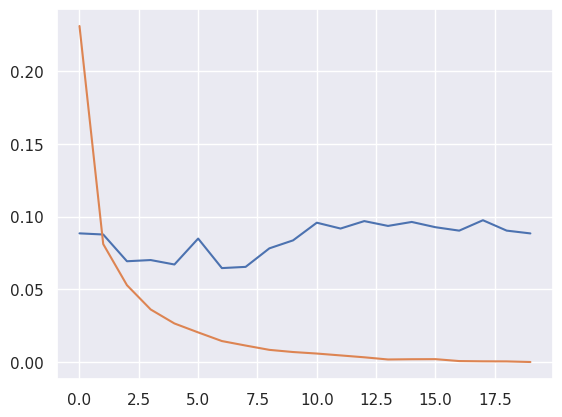

In [25]:
plt.plot(df.index, df['val_loss'])
plt.plot(df.index, df['loss'])

In [26]:

def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()


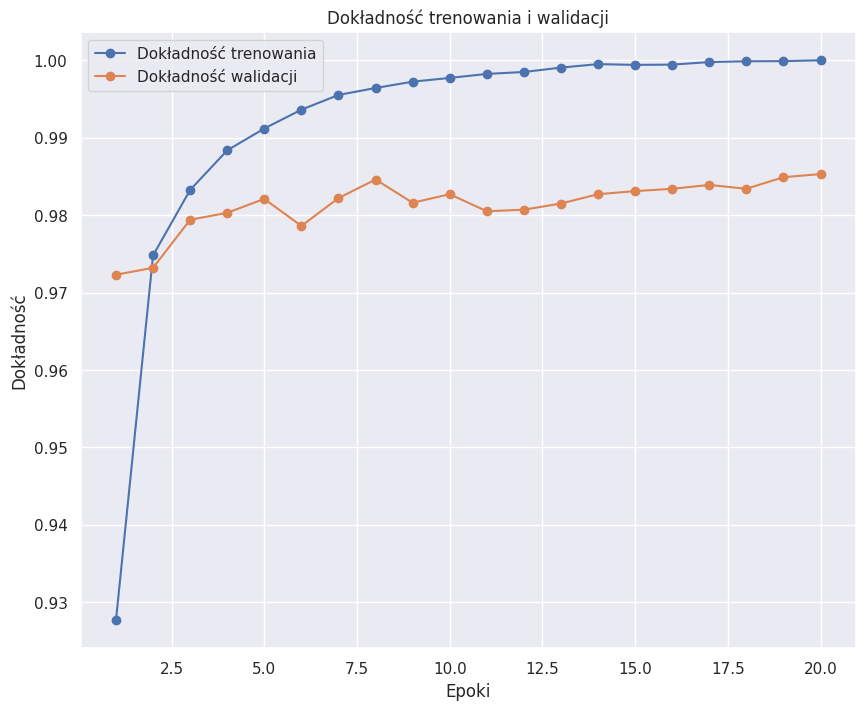

In [27]:

make_accuracy_plot(history)

In [28]:
model = Sequential()
model.add(Dense(units=512, input_shape=(28*28,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.2552 - accuracy: 0.9220 - val_loss: 0.1648 - val_accuracy: 0.9487
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1034 - accuracy: 0.9691 - val_loss: 0.0894 - val_accuracy: 0.9723
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0790 - val_accuracy: 0.9783
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0671 - val_accuracy: 0.9823
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0697 - val_accuracy: 0.9785
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0691 - val_accuracy: 0.9809
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0725 - val_accuracy: 0.9807
Epoch 

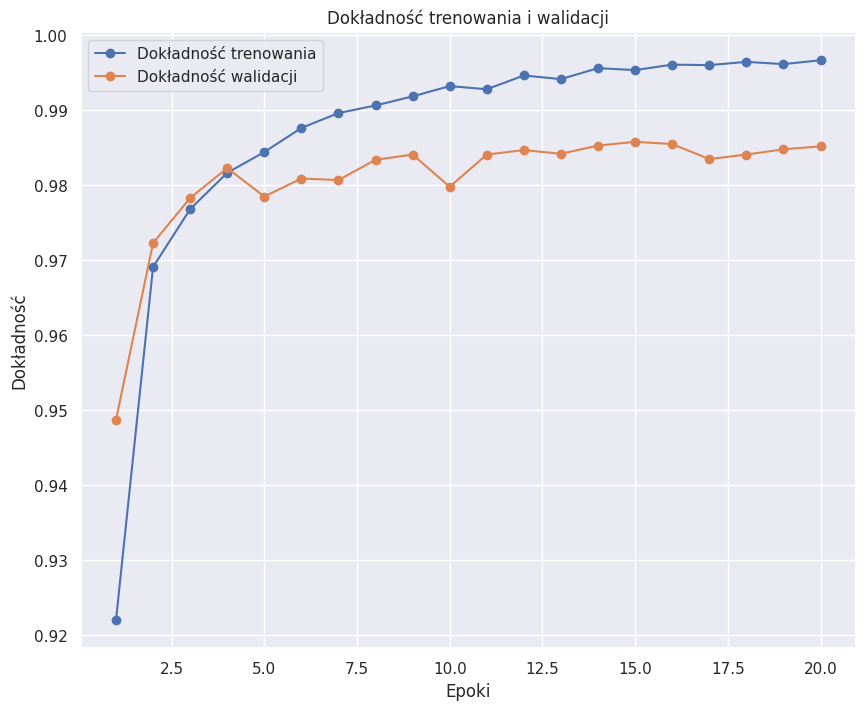

In [31]:
make_accuracy_plot(history)

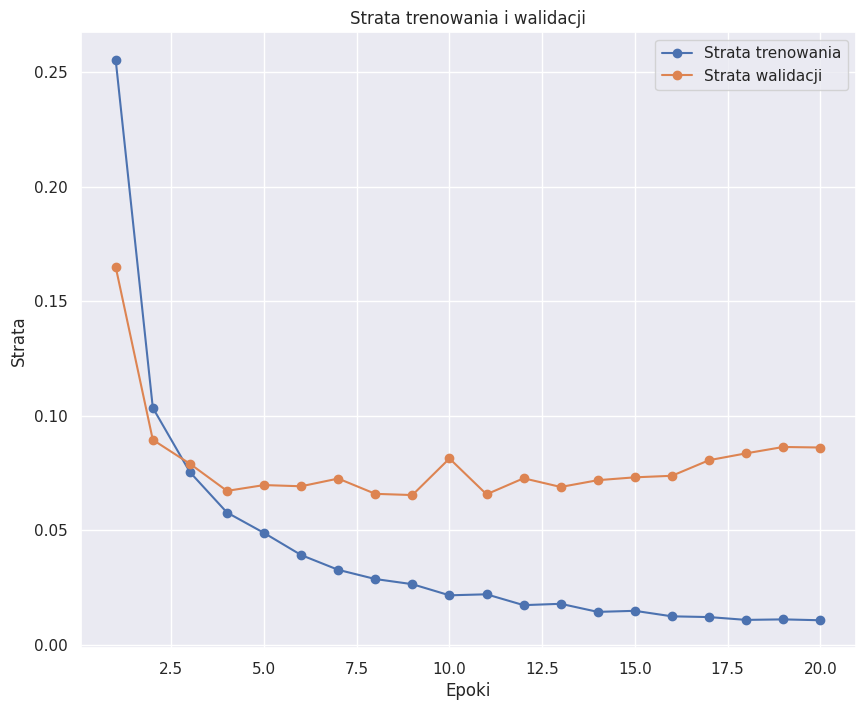

In [32]:
make_loss_plot(history)